<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [16]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [99]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [100]:
especies_registradas = df['species'].unique()
print(especies_registradas)
print(len(especies_registradas))

['setosa' ' virginica' 'VIRGINICA' 'virginica' 'virginica ' 'versicolor'
 'Versicolor' 'VERSICOLOR' nan 'Setosa' 'SETOSA']
11


In [112]:
#Se deben arreglar datos mal ingresados, ya que solo existen 3 especies
df['species'] = df['species'].str.lower().str.strip()  #pasamos datos a minusculas y eliminamos espacios
df['species'] = df['species'].fillna('default')
especies_registradas = df['species'].unique()

df.groupby('species').count()

,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
default,1,1,1,1
setosa,50,50,50,50
versicolor,49,49,49,49
virginica,50,50,50,50


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

AxesSubplot(0.125,0.125;0.775x0.755)


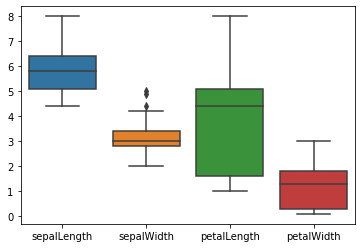

In [102]:
datos_box = df.drop(['species'], axis = 1)
df.loc[df['sepalLength'].isnull(),'sepalLength'] = '0'
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = '0'
df.loc[df['petalLength'].isnull(),'petalLength'] = '0'
df.loc[df['petalWidth'].isnull(),'petalWidth'] = '0'

print(sns.boxplot(data= datos_box))

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [117]:
df['sepalLength'] = df['sepalLength'].astype(float)
df['sepalWidth'] = df['sepalWidth'].astype(float)
df['petalLength'] = df['petalLength'].astype(float)
df['petalWidth'] = df['petalWidth'].astype(float)
#Rango valores sepal length
mask_sepalength_sup = df['sepalLength']<=7.0
mask_sepalength_inf = df['sepalLength']>=4.0
mask_sepallength = mask_sepalength_sup & mask_sepalength_inf
#Rango valores sepal width
mask_sepalwidth_sup = df['sepalWidth']<=4.5
mask_sepalwidth_inf = df['sepalWidth']>=2.0
mask_sepalwidth = mask_sepalwidth_sup & mask_sepalwidth_inf
#Rango valores petal length
mask_petallength_sup = df['petalLength']<=7.0
mask_petallength_inf = df['petalLength']>=1.0
mask_petallength = mask_petallength_sup & mask_petallength_inf
#Rango valores petal width
mask_petalwidth_sup = df['petalWidth']<=2.5
mask_petalwidth_inf = df['petalWidth']>=0.1
mask_petalwidth = mask_petalwidth_sup & mask_petalwidth_inf

mask = mask_petallength & mask_petalwidth & mask_sepallength & mask_sepalwidth

df_valido = df[mask]
df['label'] = ''

for i in df.index:
    if i in df_valido.index:
        df['label'][i]='valido'
    else:
        df['label'][i]='invalido'
df.head()

C:\Users\martin\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\martin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,invalido
1,7.2,3.6,6.1,2.5,virginica,invalido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

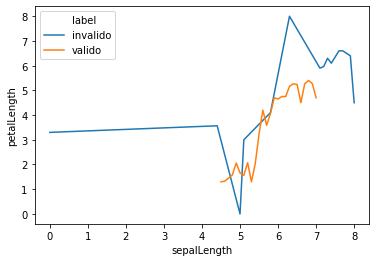

In [122]:
sns.lineplot(
    x = 'sepalLength',
    y = 'petalLength',
    hue = 'label',
    data = df,
    ci = None
    )

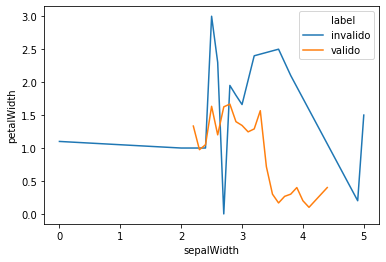

In [121]:
sns.lineplot(
    x = 'sepalWidth',
    y = 'petalWidth',
    hue = 'label',
    data = df,
    ci = None
    )

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

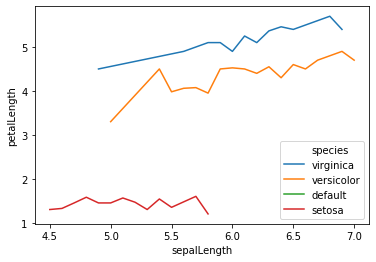

In [120]:
sns.lineplot(
    x = 'sepalLength',
    y = 'petalLength',
    hue = 'species',
    data = df_valido,
    ci = None
    )